# Programmation (2) - Sujet 1 - Devine la corrélation !

## Exercice 1

In [ ]:
from numpy import arange
from numpy.random import uniform
from numpy.random import normal

def generate_data(n=20):
    """
    Fonction qui génère aléatoirement un série bivariée (X, Y) de n individus
    Argument :
     - n : entier, nombre de points (valeur par défaut : 20)
    Retour :
     - x : liste de n réels, valeurs de X
     - y : liste de n réels, valeurs de Y
    """
    # on génère n valeurs par pas de 1/n entre 0 et 1
    x = arange(start=0, stop=1, step=1/n)
    # on génère les valeurs de y une à une
    y = [] # liste vide
    pente = uniform(low=0, high=0.75) # choix de la pente
    sigma = uniform(low=0.01, high=0.2) # choix de l'écart-type du terme d'erreur
    for i in range(len(x)):
        erreur_i = normal(loc=0, scale=sigma) # tirage aléatoire du terme d'erreur pour l'individu i
        y.append(pente * x[i] + erreur_i) # calcul de y_i et ajout à la liste y
    return x, y

x, y = generate_data(n=10)
print(x)
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[-0.038292370431438044, 0.04020382736593602, 0.15080109885833762, 0.17661859743500583, 0.22633346046334868, 0.27370598422148124, 0.3543634002986894, 0.4348705485974701, 0.4618913846802455, 0.5663958534370317]


## Exercice 2

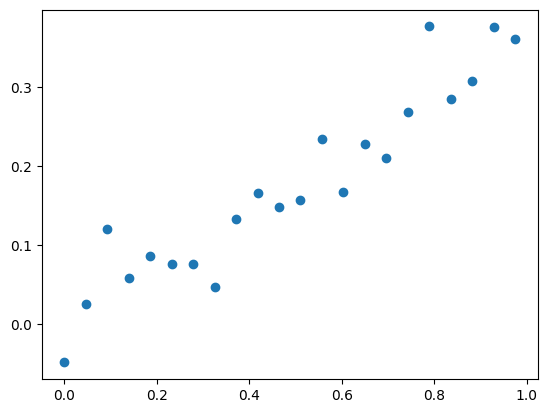

Coefficient estimé : 0.8


(0.9424305837579563, 0.8)

In [ ]:
from scipy.stats import pearsonr # mesure le coefficient de corrélation linéaire et la p-valeur
from matplotlib.pyplot import scatter # configure un graphique en nuage de points
from matplotlib.pyplot import show # affiche les graphiques

def play_turn():
    """
    Fonction qui permet de jouer un tableau du jeu
    Retour :
    - coefficient_mesuré : coefficient de corrélation linéaire mesuré sur les données
    - coefficient_estimé : coefficient de corrélation estimée visuellement par le joueur
    """
    x, y = generate_data(uniform(low=20, high=30)) # génération d'une série bivariée de 20 à 30 individus
    coefficient_mesuré = pearsonr(x, y).statistic # calcul et mémorisation du coefficient de corrélation linéaire
    scatter(x, y) # configuration du nuage de points
    show() # affichage du nuage de points
    coefficient_estimé = float(input("Coefficient estimé : ")) # lecture d'une valeur réelle (float) au clavier
    return coefficient_mesuré, coefficient_estimé

coef_mesuré, coef_estimé = play_turn()
erreur = abs(coef_mesuré - coef_estimé)

Vies : 3, Pièces : 0


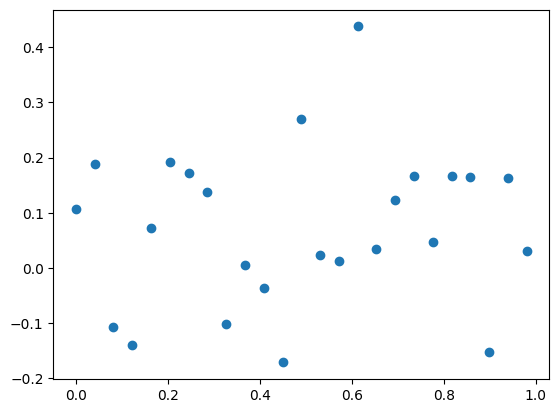

Vies : 2, Pièces : 0


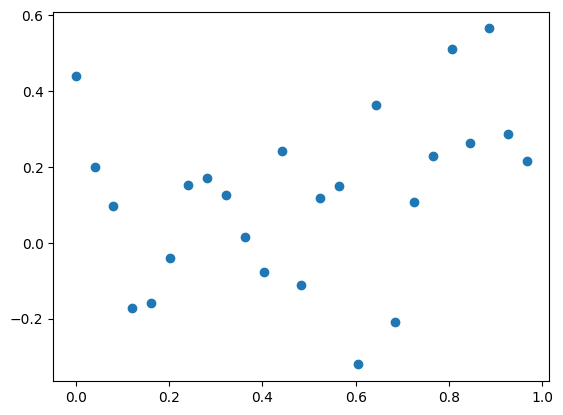

Vies : 2, Pièces : 1


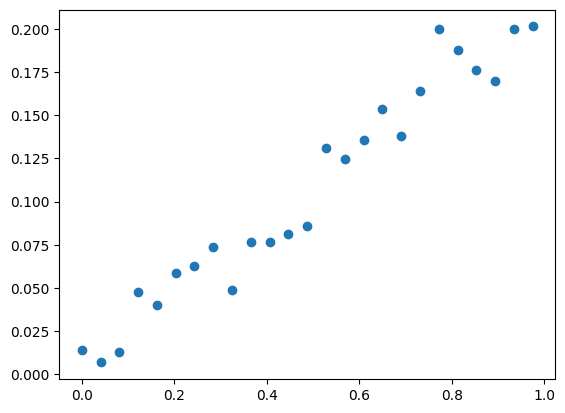

Vies : 3, Pièces : 6


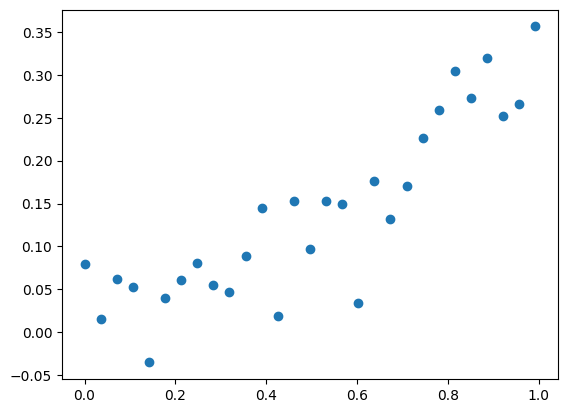

In [ ]:
def play_game():
    """
    Fonction qui permet de jouer une partie du jeu
    Retour :
    - pièces : le nombre de pièces gagnées lors de la partie
    """
    vies = 3
    pièces = 0
    while vies > 0:
        print(f"Vies : {vies}, Pièces : {pièces}")
        coef_mesuré, coef_estimé = play_turn()
        erreur = abs(coef_mesuré - coef_estimé)
        if erreur > 0.1:
            vies = vies - 1
        else:
            pièces = pièces + 1
            if erreur <= 0.05:
                pièces = pièces + 4
                if vies < 3:
                    vies = vies + 1
    return pièces

play_game()